In [1]:
def download_data():
    import nest_asyncio
    nest_asyncio.apply()
    from tardis_dev import datasets
    
    datasets.download(
        exchange="deribit",
        data_types=["options_chain"],
        from_date="2022-09-01",
        to_date="2022-09-02",
        symbols=["OPTIONS"]
    )
    
    !gzip -d datasets/*.gz

In [2]:
import os.path

fname = './datasets/deribit_options_chain_2022-09-01_OPTIONS.csv'
if not os.path.isfile(fname):
    download_data()
    
!ls -la datasets

итого 7405140
drwxrwxr-x 2 alex alex       4096 сен 30 10:24 .
drwxrwxr-x 4 alex alex       4096 окт  7 12:12 ..
-rw-rw-r-- 1 alex alex    2073002 сен 24 00:22 BTC-28OCT22-C.csv
-rw-rw-r-- 1 alex alex    1953675 сен 24 00:22 BTC-28OCT22-P.csv
-rw-rw-r-- 1 alex alex    2393243 сен 24 00:22 BTC-30DEC22-C.csv
-rw-rw-r-- 1 alex alex    2266538 сен 24 00:22 BTC-30DEC22-P.csv
-rw-rw-r-- 1 alex alex    1823975 сен 24 00:22 BTC-30JUN23-C.csv
-rw-rw-r-- 1 alex alex    1827753 сен 24 00:22 BTC-30JUN23-P.csv
-rw-rw-r-- 1 alex alex    2732033 сен 24 00:22 BTC-30SEP22-C.csv
-rw-rw-r-- 1 alex alex    2506136 сен 24 00:22 BTC-30SEP22-P.csv
-rw-rw-r-- 1 alex alex    2150284 сен 24 00:22 BTC-31MAR23-C.csv
-rw-rw-r-- 1 alex alex    2028545 сен 24 00:22 BTC-31MAR23-P.csv
-rw-rw-r-- 1 alex alex      45882 сен 24 00:22 BTC-7OCT22-C.csv
-rw-rw-r-- 1 alex alex      32188 сен 24 00:22 BTC-7OCT22-P.csv
-rw-rw-r-- 1 alex alex 7560971286 сен 30 10:22 deribit_options_chain_2022-09-01_OPTIONS.csv


In [12]:
import sys
sys.path.append('../SABR')

sys.path.append('../heston')

In [13]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

In [14]:
df = pd.read_csv(fname, nrows=200000)

In [15]:
set(df.underlying_index)

{'BTC-28OCT22',
 'BTC-2SEP22',
 'BTC-30DEC22',
 'BTC-30JUN23',
 'BTC-30SEP22',
 'BTC-31MAR23',
 'BTC-9SEP22',
 'ETH-28OCT22',
 'ETH-2SEP22',
 'ETH-30DEC22',
 'ETH-30JUN23',
 'ETH-30SEP22',
 'ETH-31MAR23',
 'ETH-9SEP22',
 'SOL-28OCT22',
 'SOL-2SEP22',
 'SOL-30SEP22',
 'SOL-9SEP22',
 'SYN.BTC-16SEP22',
 'SYN.BTC-1SEP22',
 'SYN.BTC-25NOV22',
 'SYN.ETH-16SEP22',
 'SYN.ETH-1SEP22',
 'SYN.ETH-25NOV22',
 'SYN.SOL-1SEP22'}

In [16]:
df.head(10)

,exchange,symbol,timestamp,local_timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,bid_amount,bid_iv,ask_price,ask_amount,ask_iv,mark_price,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho
0,deribit,ETH-30DEC22-1300-P,1661990399996000,1661990400002270,put,1300,1672387200000000,8046.0,0.1375,0.1465,123.0,101.36,0.1490,121.0,102.64,0.1478,102.05,ETH-30DEC22,1523.1100,-0.28662,0.00038,2.97707,-1.26233,-2.18163
1,deribit,ETH-30DEC22-15000-P,1661990400007000,1661990400011122,put,15000,1672387200000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.8488,135.30,ETH-30DEC22,1523.1100,-0.99470,0.00001,0.13314,-0.07485,-49.43078
2,deribit,ETH-31MAR23-4500-P,1661990400048000,1661990400061948,put,4500,1680249600000000,16.0,1.2695,NaN,NaN,NaN,2.2620,1.0,200.16,1.9889,97.66,ETH-31MAR23,1525.6200,-0.86084,0.00020,2.57325,-0.59455,-25.17323
3,deribit,ETH-25NOV22-1600-P,1661990400063000,1661990400073423,put,1600,1669363200000000,273.0,0.2170,0.2205,138.0,99.45,0.2240,101.0,101.29,0.2235,101.04,SYN.ETH-25NOV22,1524.3589,-0.44230,0.00053,2.90962,-1.72252,-2.37288
4,deribit,ETH-25NOV22-1600-P,1661990400096000,1661990400106456,put,1600,1669363200000000,273.0,0.2170,0.2205,138.0,99.45,0.2240,252.0,101.29,0.2235,101.04,SYN.ETH-25NOV22,1524.3589,-0.44230,0.00053,2.90962,-1.72252,-2.37288
5,deribit,BTC-30DEC22-21000-P,1661990400145000,1661990400153970,put,21000,1672387200000000,286.8,0.1795,0.1825,10.5,67.51,0.1900,8.0,70.80,0.1861,69.09,BTC-30DEC22,20038.5100,-0.46804,0.00005,45.75363,-13.13423,-43.21403
6,deribit,BTC-30DEC22-20000-P,1661990400150000,1661990400159447,put,20000,1672387200000000,1363.6,0.1530,0.1560,27.0,69.04,0.1595,8.0,70.60,0.1572,69.56,BTC-30DEC22,20038.5100,-0.41897,0.00005,44.95096,-12.99261,-38.06227
7,deribit,ETH-30DEC22-1300-P,1661990400152000,1661990400160133,put,1300,1672387200000000,8046.0,0.1375,0.1470,1.0,101.61,0.1490,121.0,102.64,0.1478,102.05,ETH-30DEC22,1523.1100,-0.28662,0.00038,2.97707,-1.26233,-2.18163
8,deribit,BTC-28OCT22-23000-C,1661990400192000,1661990400195281,call,23000,1666944000000000,202.1,0.0525,0.0520,18.2,65.66,0.0530,7.9,66.35,0.0523,65.89,BTC-28OCT22,20010.6600,0.34363,0.00007,29.17678,-16.76600,9.15609
9,deribit,ETH-25NOV22-2400-P,1661990400207000,1661990400217444,put,2400,1669363200000000,0.0,NaN,NaN,NaN,NaN,0.8120,1.0,200.04,0.6286,98.93,SYN.ETH-25NOV22,1524.3589,-0.76107,0.00043,2.28573,-1.32493,-4.95222


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   exchange          200000 non-null  object 
 1   symbol            200000 non-null  object 
 2   timestamp         200000 non-null  int64  
 3   local_timestamp   200000 non-null  int64  
 4   type              200000 non-null  object 
 5   strike_price      200000 non-null  int64  
 6   expiration        200000 non-null  int64  
 7   open_interest     200000 non-null  float64
 8   last_price        161457 non-null  float64
 9   bid_price         122469 non-null  float64
 10  bid_amount        122469 non-null  float64
 11  bid_iv            107341 non-null  float64
 12  ask_price         154459 non-null  float64
 13  ask_amount        154459 non-null  float64
 14  ask_iv            154459 non-null  float64
 15  mark_price        200000 non-null  float64
 16  mark_iv           20

In [18]:
btc_ind = [symbol.startswith('BTC') for symbol in df.underlying_index]

columns_to_drop = ['exchange', 'symbol', 'local_timestamp', 'underlying_index', 
                   'delta', 'gamma', 'vega', 'theta', 'rho',
                  'bid_iv', 'ask_iv']

In [19]:
btc = df[btc_ind].reset_index(drop=True).drop(columns_to_drop, axis=1)

btc["tau"] = (btc.expiration - btc.timestamp) / 1e6 / 3600 / 24 / 365
btc['days'] = (btc['tau'] * 365).astype(int)
#btc.timestamp = pd.to_datetime(df.timestamp // 1000, unit='ms')
#btc.expiration = pd.to_datetime(df.expiration // 1000, unit='ms')

K = btc.strike_price.values
F = btc.underlying_price.values

payoff = np.zeros_like(K)

payoff = np.maximum( F - K, 0.0 )
payoff[btc.type == 'put'] = np.maximum( K - F, 0.0)[btc.type == 'put']

btc["payoff"] = payoff

btc['mid_price'] = 0.5 * (btc.ask_price + btc.bid_price)

In [20]:
btc.head(15)

,timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,bid_amount,ask_price,ask_amount,mark_price,mark_iv,underlying_price,tau,days,payoff,mid_price
0,1661990400145000,put,21000,1672387200000000,286.8,0.1795,0.1825,10.5,0.1900,8.0,0.1861,69.09,20038.51,0.329680,120,961.49,0.18625
1,1661990400150000,put,20000,1672387200000000,1363.6,0.1530,0.1560,27.0,0.1595,8.0,0.1572,69.56,20038.51,0.329680,120,0.00,0.15775
2,1661990400192000,call,23000,1666944000000000,202.1,0.0525,0.0520,18.2,0.0530,7.9,0.0523,65.89,20010.66,0.157078,57,0.00,0.05250
3,1661990400653000,put,20000,1672387200000000,1363.6,0.1530,0.1560,27.0,0.1605,27.0,0.1572,69.56,20038.51,0.329680,120,0.00,0.15825
4,1661990400659000,put,21000,1672387200000000,286.8,0.1795,0.1825,10.5,0.1910,27.6,0.1861,69.09,20038.51,0.329680,120,961.49,0.18675
5,1661990400680000,put,21500,1662710400000000,48.4,0.0710,0.0710,11.0,0.1035,11.0,0.0853,59.35,20017.14,0.022831,8,1482.86,0.08725
6,1661990400694000,call,19000,1662105600000000,8.9,0.0420,0.0055,5.0,0.1290,0.3,0.0542,74.16,20034.63,0.003653,1,1034.63,0.06725
7,1661990400695000,put,19000,1664524800000000,1598.8,0.0560,0.0545,1.9,0.0555,24.9,0.0548,70.84,20034.37,0.080365,29,0.00,0.05500
8,1661990400702000,call,19500,1662710400000000,47.7,0.0540,0.0520,17.8,0.0545,16.1,0.0533,65.56,20017.14,0.022831,8,517.14,0.05325
9,1661990400708000,put,15000,1662710400000000,153.7,0.0015,0.0010,41.3,0.0020,121.3,0.0012,97.62,20016.99,0.022831,8,0.00,0.00150


In [21]:
btc_grouped = btc.groupby(['type', 'expiration', 'strike_price']).agg(lambda x: x.iloc[-1]).reset_index().drop(["timestamp"], axis=1)

In [22]:
put = btc_grouped[btc_grouped.type == 'put'].drop(['type'], axis=1).reset_index(drop=True)

call = btc_grouped[btc_grouped.type == 'call'].drop(['type'], axis=1).reset_index(drop=True)

In [23]:
put.head(10)

,expiration,strike_price,open_interest,last_price,bid_price,bid_amount,ask_price,ask_amount,mark_price,mark_iv,underlying_price,tau,days,payoff,mid_price
0,1662105600000000,13000,20.5,0.0010,NaN,NaN,0.0005,34.0,0.0000,127.05,20087.59,0.003641,1,0.00,NaN
1,1662105600000000,14000,38.4,0.0005,NaN,NaN,0.0005,42.5,0.0000,127.05,20087.59,0.003641,1,0.00,NaN
2,1662105600000000,15000,130.0,0.0005,NaN,NaN,0.0005,39.0,0.0000,120.27,20087.59,0.003641,1,0.00,NaN
3,1662105600000000,16000,578.2,0.0005,NaN,NaN,0.0010,89.0,0.0000,101.18,20087.59,0.003641,1,0.00,NaN
4,1662105600000000,17000,579.9,0.0005,NaN,NaN,0.0005,11.0,0.0000,95.26,20087.59,0.003641,1,0.00,NaN
5,1662105600000000,18000,3570.2,0.0005,NaN,NaN,0.0005,12.0,0.0004,88.26,20087.92,0.003641,1,0.00,NaN
6,1662105600000000,19000,2387.5,0.0020,0.0020,15.4,0.0025,20.5,0.0022,74.19,20087.66,0.003641,1,0.00,0.00225
7,1662105600000000,19500,932.7,0.0065,0.0050,7.3,0.0055,13.4,0.0052,66.41,20088.07,0.003641,1,0.00,0.00525
8,1662105600000000,20000,1362.8,0.0135,0.0115,39.9,0.0130,27.1,0.0124,60.35,20087.18,0.003640,1,0.00,0.01225
9,1662105600000000,20500,672.5,0.0200,0.0255,14.2,0.0275,28.6,0.0266,57.68,20087.35,0.003641,1,412.65,0.02650


In [24]:
call.head(10)

,expiration,strike_price,open_interest,last_price,bid_price,bid_amount,ask_price,ask_amount,mark_price,mark_iv,underlying_price,tau,days,payoff,mid_price
0,1662105600000000,13000,0.0,NaN,0.2425,3.0,0.4480,3.0,0.3528,127.05,20087.35,0.003641,1,7087.35,0.34525
1,1662105600000000,14000,0.0,NaN,0.1925,3.0,0.3980,3.0,0.3031,127.05,20087.92,0.003641,1,6087.92,0.29525
2,1662105600000000,15000,0.0,NaN,0.1430,3.0,0.3485,3.0,0.2533,120.27,20087.35,0.003641,1,5087.35,0.24575
3,1662105600000000,16000,0.0,NaN,0.0930,3.0,0.2985,3.0,0.2035,101.18,20087.92,0.003641,1,4087.92,0.19575
4,1662105600000000,17000,0.0,NaN,0.0435,3.0,0.2490,3.0,0.1537,95.26,20087.35,0.003641,1,3087.35,0.14625
5,1662105600000000,18000,0.0,NaN,NaN,NaN,0.1995,3.0,0.1043,88.26,20087.35,0.003641,1,2087.35,NaN
6,1662105600000000,19000,8.9,0.0420,0.0055,2.0,0.1515,3.3,0.0564,74.19,20087.92,0.003641,1,1087.92,0.07850
7,1662105600000000,19500,52.4,0.0350,0.0330,7.4,0.0365,8.2,0.0345,66.41,20087.92,0.003641,1,587.92,0.03475
8,1662105600000000,20000,604.0,0.0140,0.0160,16.0,0.0170,3.8,0.0168,60.35,20087.59,0.003641,1,87.59,0.01650
9,1662105600000000,20500,633.3,0.0065,0.0055,6.5,0.0060,0.1,0.0061,57.68,20087.18,0.003640,1,0.00,0.00575


# Calibration

In [25]:
import sys
sys.path.append('../../SABR')

sys.path.append('../../heston')

In [26]:
from heston import *
from heston_derivatives import *
from heston_calibration import *
from double_heston_calibration import *

In [27]:
def gen_random_heston_params():
    v0 = np.random.rand(1) * 0.15 + 0.01
    theta = np.random.rand(1) * 0.15 + 0.01
    
    rho = -0.9 + (1.8) * np.random.rand(1)
    k = np.random.rand(1) * 2 + 1.0
    sig = np.random.rand(1) * 0.02 + 0.01
    
    return v0[0], theta[0], rho[0], k[0], sig[0]

In [28]:
def get_data_from_df(df):
    #choose only out of the money options
    ind = (df.payoff == 0.0) & (~np.isnan(df.mid_price).values)
   # ind = (~np.isnan(df.mid_price).values)
    df_ = df[ind].copy().reset_index(drop=True)
    
    F = df_.underlying_price.values
    K = df_.strike_price.values
    tau = df_.tau.values
        
    mid = df_.mid_price.values * F
    
    #weigths are propotional to open interest
    interest = df_.open_interest.values
    
    weights = interest / np.sum(interest)
    
    return K, F, tau, mid, interest, weights


def get_residals(df, isCall, heston_params):
    K, F, tau, mid, interest, weights = get_data_from_df(df)
    
    c, ders = getOptionPriceDerABDouble(F, K, 200, tau, r, heston_params, isCall=isCall)
    
    ders = np.asarray(ders)
    
    res = (c - mid) * weights
    J = ders @ np.diag(weights)
    return res, J

In [49]:
def foo(heston_params):
    res_call, J_call = get_residals(call, True, heston_params)
    res_put,  J_put  = get_residals(put, False, heston_params)
    
    res = np.r_[res_call, res_put]
    J = np.c_[J_call, J_put]
    
    return res, J

In [50]:
proj = my_clip

In [51]:
Niter = 150

In [52]:
r = 0.0

Ndim = 2

params = []

for _ in range(Ndim):
    params += list(gen_random_heston_params())
heston_params = np.asarray(params)

In [53]:
heston_params, fs = MyAlgorithm(Niter, foo, proj, heston_params)

In [54]:
heston_params

array([ 2.48828129e-01,  3.79900278e+00, -1.61861744e-01,  7.91158404e-02,
        8.72424909e-01,  2.70159666e-01,  2.01670986e+05, -4.98640313e-01,
        4.56440466e-06,  5.99685985e+00])

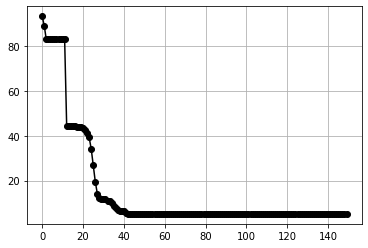

In [55]:
plt.plot(fs, '-ok')
plt.grid()

In [56]:
F = call.underlying_price.values
K = call.strike_price.values
tau = call.tau.values

C_calibrated, _ = getOptionPriceDerABDouble(F, K, 200, tau, r, heston_params, isCall=True)

call_calibrated = pd.DataFrame( {"strike_price" : K, "days" : call.days.values, "mid_price" : C_calibrated} )

In [57]:
F = put.underlying_price.values
K = put.strike_price.values
tau = put.tau.values

P_calibrated, _ = getOptionPriceDerABDouble(F, K, 200, tau, r, heston_params, isCall=False)

put_calibrated = pd.DataFrame( {"strike_price" : K, "days" : put.days.values, "mid_price" : P_calibrated} )

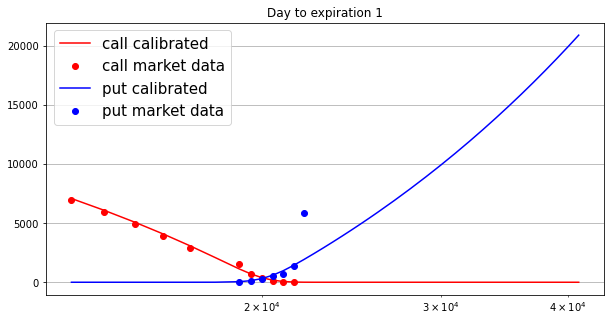

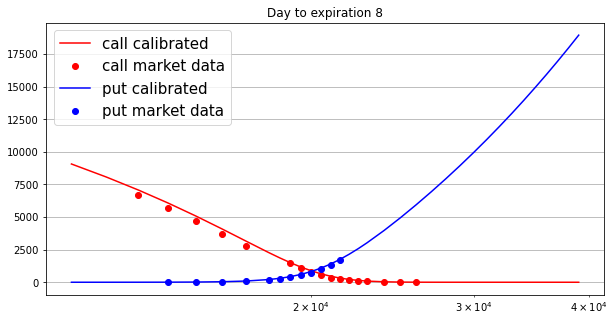

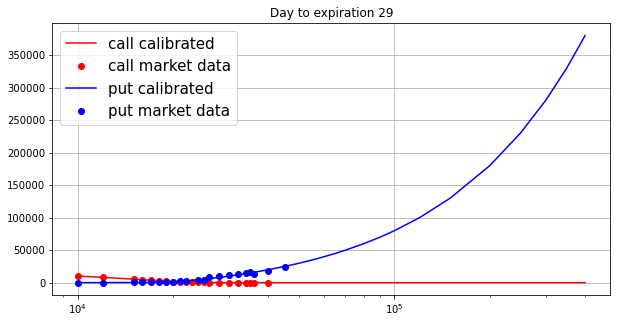

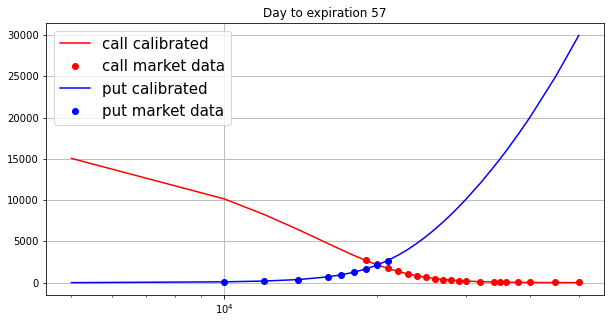

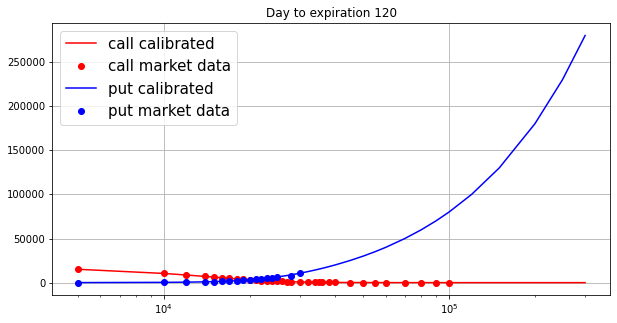

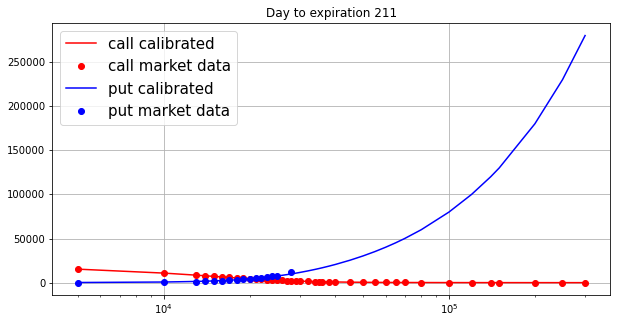

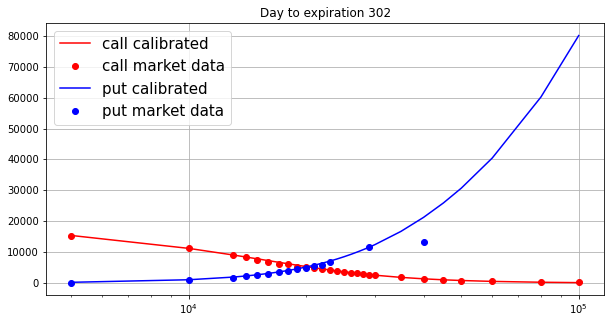

In [64]:
for (d, tmp), (d1, tmp1) in zip(call_calibrated.groupby('days'), put_calibrated.groupby('days')):
    
    tmp_call = call[call.days == d]
    tmp_put  = put[put.days == d]
    
    plt.figure(figsize=(10, 5))
    plt.semilogx(tmp.strike_price, tmp.mid_price + 1e-5, '-r', label='call calibrated')
    plt.semilogx(tmp_call.strike_price, tmp_call.mid_price * tmp_call.underlying_price + 1e-5, 'ro',
                label = 'call market data')
    
    plt.semilogx(tmp1.strike_price, tmp1.mid_price + 1e-5, '-b', label='put calibrated')
    plt.semilogx(tmp_put.strike_price, tmp_put.mid_price * tmp_put.underlying_price + 1e-5, 'bo',
                label='put market data')
    plt.legend(fontsize=15)
    plt.title(f'Day to expiration {d}')
    plt.grid()